In [3]:
import csv
import requests
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [4]:
df_penetracion = pd.read_csv('../data/processed/penetracion.csv')

In [5]:
df_penetracion

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.21,24.15,Oct-Dic 2022
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021
5,2021,3,70.58,21.98,Jul-Sept 2021
6,2021,2,69.24,21.55,Abr-Jun 2021
7,2021,1,67.95,21.13,Ene-Mar 2021
8,2020,4,67.62,21.01,Oct-Dic 2020
9,2020,3,66.31,20.59,Jul-Sept 2020


In [6]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


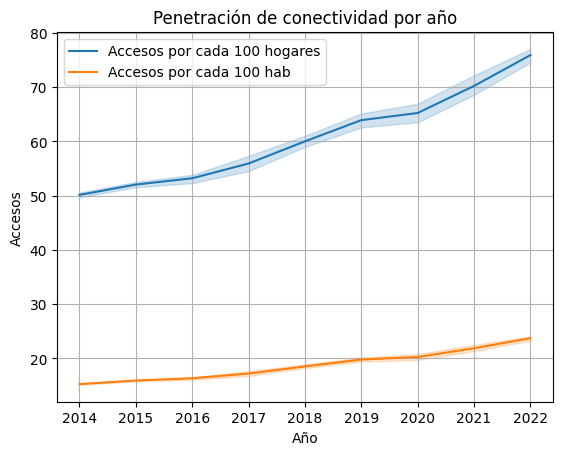

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de línea para 'Accesos por cada 100 hogares'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares')

# Gráfico de línea para 'Accesos por cada 100 hab'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 hab')

plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Penetración de conectividad por año')
plt.grid()
plt.legend()
plt.show()

In [5]:
df_accesos_velocidad = pd.read_csv('../data/processed/accesos_velocidad.csv')

In [8]:
df_accesos_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  864 non-null    int64 
 1   Trimestre            864 non-null    int64 
 2   Provincia            864 non-null    object
 3   HASTA 512 kbps       864 non-null    int64 
 4   + 512 Kbps - 1 Mbps  864 non-null    int64 
 5   + 1 Mbps - 6 Mbps    864 non-null    int64 
 6   + 6 Mbps - 10 Mbps   864 non-null    int64 
 7   + 10 Mbps - 20 Mbps  864 non-null    int64 
 8   + 20 Mbps - 30 Mbps  864 non-null    int64 
 9   + 30 Mbps            864 non-null    int64 
 10  OTROS                864 non-null    int64 
 11  Total                864 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 81.1+ KB


In [24]:
df_accesos_velocidad

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026,168759
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,0,26760
860,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,0,506013
861,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,0,37113
862,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,0,31527


/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
/tmp/ipykernel_132281/2171250609.py:36: UserWarning: FixedFormatter should only be used togethe

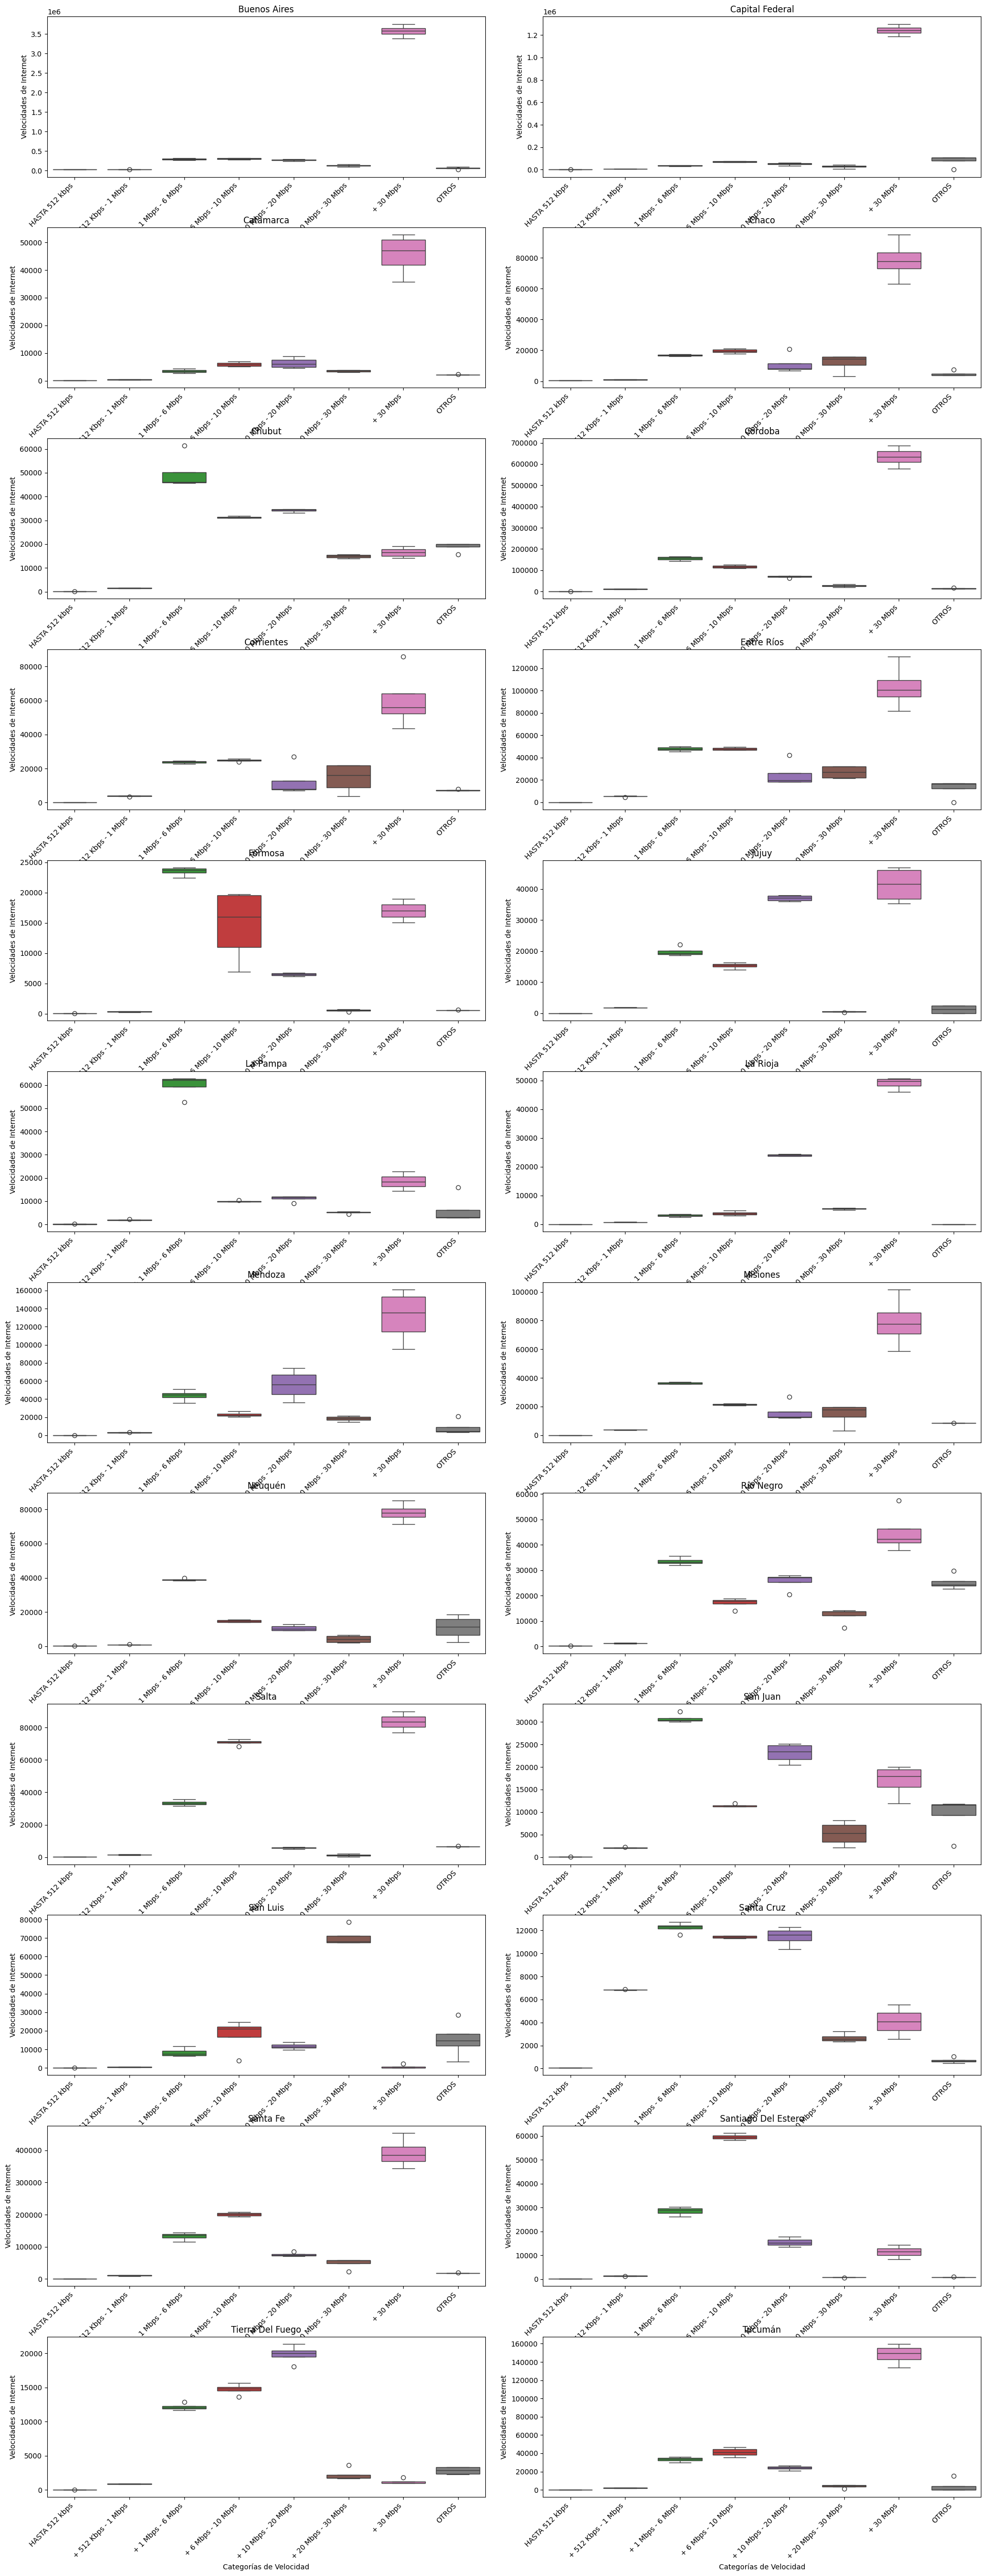

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tu DataFrame original
# df_accesos_velocidad = ...

# Filtrar datos para el año 2022
df_2022 = df_accesos_velocidad[df_accesos_velocidad['Año'] == 2022]

# Lista de columnas de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Crear subplots por provincia usando boxplot
provincias = df_2022['Provincia'].unique()
num_provincias = len(provincias)
num_filas = num_provincias // 2 + num_provincias % 2
num_columnas = 2

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 50))
fig.tight_layout(pad=5)

for i, provincia in enumerate(provincias):
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axes[fila, columna]
    
    # Filtrar datos por provincia
    datos_provincia = df_2022[df_2022['Provincia'] == provincia]
    
    # Crear el boxplot para la provincia actual
    sns.boxplot(data=datos_provincia[columnas_velocidad], ax=ax)
    
    # Establecer etiquetas y título
    ax.set_xticklabels(columnas_velocidad, rotation=45, ha='right')
    ax.set_title(provincia)
    ax.set_ylabel('Velocidades de Internet')
    ax.set_xlabel('Categorías de Velocidad')

# Ocultar subplots vacíos si existen
for i in range(num_provincias, num_filas * num_columnas):
    fig.delaxes(axes.flatten()[i])

# Mostrar el gráfico
plt.show()


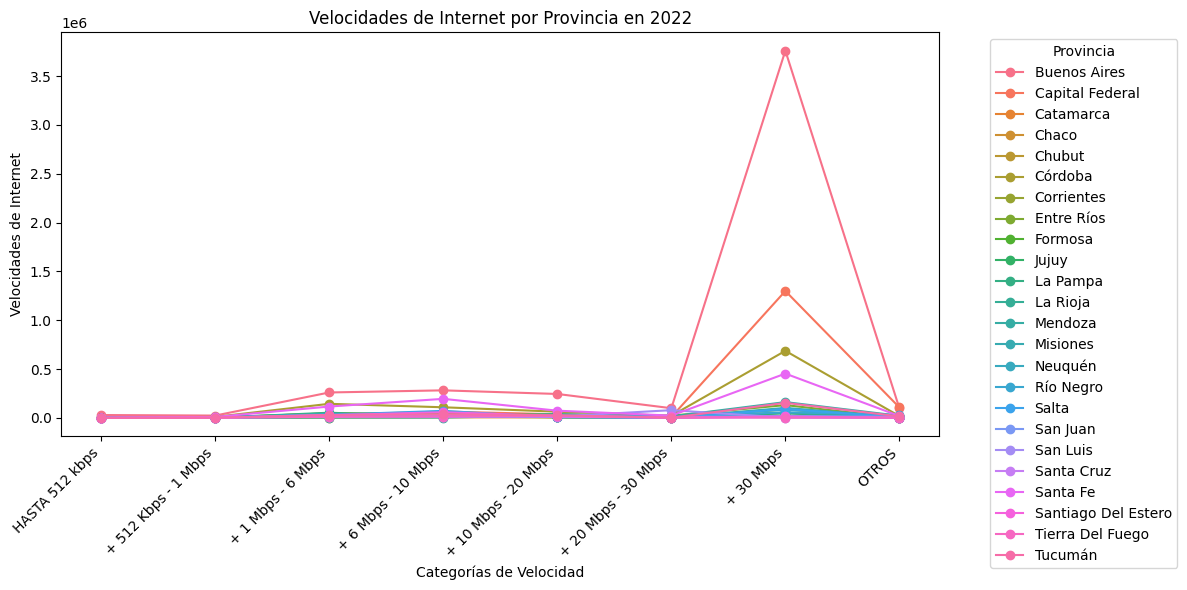

In [26]:
# Filtrar datos para el año 2022
df_2022 = df_accesos_velocidad[df_accesos_velocidad['Año'] == 2022]

# Lista de columnas de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.set_palette("husl", len(df_2022['Provincia'].unique()))

for provincia in df_2022['Provincia'].unique():
    datos_provincia = df_2022[df_2022['Provincia'] == provincia]
    plt.plot(columnas_velocidad, datos_provincia[columnas_velocidad].iloc[0], label=provincia, marker='o')

# Establecer etiquetas y título
plt.xlabel('Categorías de Velocidad')
plt.ylabel('Velocidades de Internet')
plt.title('Velocidades de Internet por Provincia en 2022')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [24]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 27.4 MB/s eta 0:00:0000:0100:01


In [29]:
import pandas as pd
import streamlit as st
import plotly.express as px

# Tu DataFrame original
# df_accesos_velocidad = ...

# Lista de columnas de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Sidebar para seleccionar año
st.sidebar.header('Filtros')
selected_year = st.sidebar.selectbox('Selecciona un año:', sorted(df_accesos_velocidad['Año'].unique()))

# Filtrar datos según la selección del usuario
filtered_data = df_accesos_velocidad[df_accesos_velocidad['Año'] == selected_year]

# Reformatear los datos para tener solo dos columnas: categorías de velocidad y valores
melted_data = filtered_data.melt(id_vars=['Provincia'], value_vars=columnas_velocidad, 
                                 var_name='Categoría de Velocidad', value_name='Velocidad de Internet')

# Crear el gráfico interactivo
fig = px.line(melted_data, x='Categoría de Velocidad', y='Velocidad de Internet', color='Provincia',
              labels={'variable': 'Categorías de Velocidad', 'value': 'Velocidades de Internet'},
              title=f'Velocidades de Internet para el año {selected_year}',
              template='plotly')

# Mostrar el gráfico interactivo
st.plotly_chart(fig)


DeltaGenerator()

In [28]:
df_accesos_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  864 non-null    int64 
 1   Trimestre            864 non-null    int64 
 2   Provincia            864 non-null    object
 3   HASTA 512 kbps       864 non-null    int64 
 4   + 512 Kbps - 1 Mbps  864 non-null    int64 
 5   + 1 Mbps - 6 Mbps    864 non-null    int64 
 6   + 6 Mbps - 10 Mbps   864 non-null    int64 
 7   + 10 Mbps - 20 Mbps  864 non-null    int64 
 8   + 20 Mbps - 30 Mbps  864 non-null    int64 
 9   + 30 Mbps            864 non-null    int64 
 10  OTROS                864 non-null    int64 
 11  Total                864 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 81.1+ KB
